In [ ]:
! pip install datasets transformers accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 kB 3.1 MB/s eta 0:00:00


## Load the dataset.

In [ ]:
from datasets import load_dataset

dataset_name = "beans"
dataset = load_dataset(dataset_name)
dataset

DatasetDict({
    train: Dataset({
        features: ['image_file_path', 'image', 'labels'],
        num_rows: 1034
    })
    validation: Dataset({
        features: ['image_file_path', 'image', 'labels'],
        num_rows: 133
    })
    test: Dataset({
        features: ['image_file_path', 'image', 'labels'],
        num_rows: 128
    })
})

{'image_file_path': '/root/.cache/huggingface/datasets/downloads/extracted/b0a21163f78769a2cf11f58dfc767fb458fc7cea5c05dccc0144a2c0f0bc1292/train/bean_rust/bean_rust_train.75.jpg', 'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x500 at 0x787B53E53040>, 'labels': 1}


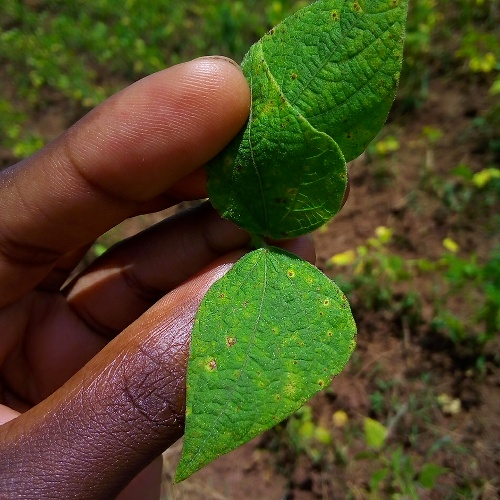

ClassLabel(names=['angular_leaf_spot', 'bean_rust', 'healthy'], id=None)
bean_rust


In [ ]:
from IPython.display import display

index = 666
example = dataset["train"][index]
print(example)

image = example["image"]
display(image)

labels = dataset["train"].features["labels"]
print(labels)

readable_label = labels.int2str(example["labels"])
print(readable_label)

## Loading the feature extractor.

In [ ]:
# https://huggingface.co/google/vit-base-patch16-224-in21k

In [ ]:
from transformers import ViTFeatureExtractor

model_name_or_path = 'google/vit-base-patch16-224-in21k'
feature_extractor = ViTFeatureExtractor.from_pretrained(model_name_or_path)

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


If we print a feature extractor, we can see its configuration.

In [ ]:
feature_extractor

ViTFeatureExtractor {
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.5,
    0.5,
    0.5
  ],
  "image_processor_type": "ViTFeatureExtractor",
  "image_std": [
    0.5,
    0.5,
    0.5
  ],
  "resample": 2,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "height": 224,
    "width": 224
  }
}

To process an image, simply pass it to the feature extractor's call function. This will return a dict containing `pixel values`, which is the numeric representation of your image that we'll pass to the model.

We get a numpy array by default, but if we add the `return_tensors='pt'` argument, we'll get back `torch` tensors instead.


In [ ]:
feature_extractor(image, return_tensors='pt')

{'pixel_values': tensor([[[[-0.6549, -0.6000, -0.5294,  ..., -0.4431, -0.4510, -0.4980],
          [-0.6235, -0.6000, -0.5373,  ..., -0.4824, -0.5059, -0.5608],
          [-0.5843, -0.5608, -0.5294,  ..., -0.4667, -0.5294, -0.6157],
          ...,
          [-0.0353, -0.0118,  0.0118,  ..., -0.3490, -0.4745, -0.6941],
          [-0.1059, -0.1137, -0.0039,  ..., -0.2784, -0.3882, -0.5529],
          [-0.1922, -0.2078, -0.1608,  ..., -0.2392, -0.2941, -0.4667]],

         [[-0.4431, -0.3961, -0.3490,  ..., -0.3882, -0.4588, -0.5373],
          [-0.4431, -0.4118, -0.3569,  ..., -0.4431, -0.5137, -0.5843],
          [-0.4510, -0.4039, -0.3490,  ..., -0.4510, -0.5294, -0.6314],
          ...,
          [-0.3255, -0.3098, -0.2863,  ..., -0.4980, -0.6000, -0.8039],
          [-0.4196, -0.4431, -0.3333,  ..., -0.4118, -0.5216, -0.6784],
          [-0.5216, -0.5529, -0.5137,  ..., -0.3647, -0.4196, -0.6000]],

         [[-0.9451, -0.9059, -0.8510,  ..., -0.7333, -0.7255, -0.7725],
          [-0

## Preprocess the dataset.

In [ ]:
def process_example(example):
    inputs = feature_extractor(example['image'], return_tensors='pt')
    inputs['labels'] = example['labels']
    return inputs

In [ ]:
process_example(dataset['train'][0])

{'pixel_values': tensor([[[[-0.5686, -0.5686, -0.5608,  ..., -0.0275,  0.1843, -0.2471],
          [-0.6078, -0.6000, -0.5765,  ..., -0.0353, -0.0196, -0.2627],
          [-0.6314, -0.6314, -0.6078,  ..., -0.2314, -0.3647, -0.2235],
          ...,
          [-0.5373, -0.5529, -0.5843,  ..., -0.0824, -0.0431, -0.0902],
          [-0.5608, -0.5765, -0.5843,  ...,  0.3098,  0.1843,  0.1294],
          [-0.5843, -0.5922, -0.6078,  ...,  0.2627,  0.1608,  0.2000]],

         [[-0.7098, -0.7098, -0.7490,  ..., -0.3725, -0.1608, -0.6000],
          [-0.7333, -0.7333, -0.7569,  ..., -0.3647, -0.3255, -0.5686],
          [-0.7490, -0.7490, -0.7725,  ..., -0.5373, -0.6549, -0.5373],
          ...,
          [-0.7725, -0.7804, -0.8196,  ..., -0.2235, -0.0353,  0.0824],
          [-0.7961, -0.8118, -0.8118,  ...,  0.1922,  0.3098,  0.3725],
          [-0.8196, -0.8196, -0.8275,  ...,  0.0824,  0.2784,  0.3961]],

         [[-0.9922, -0.9922, -1.0000,  ..., -0.5451, -0.3569, -0.7255],
          [-0

While we could call `ds.map` and apply this to every example at once, this can be very slow, especially if you use a larger dataset. Instead, we'll apply a ***transform*** to the dataset. Transforms are only applied to examples as you index them.

First, though, we'll need to update our last function to accept a batch of data, as that's what `ds.with_transform` expects.

In [ ]:
dataset = load_dataset(dataset_name)
dataset = dataset["train"]
dataset = dataset.train_test_split(0.2)

def transform(example_batch):
    # Take a list of PIL images and turn them to pixel values
    inputs = feature_extractor([x for x in example_batch['image']], return_tensors='pt')

    # Don't forget to include the labels!
    inputs['labels'] = example_batch['labels']
    return inputs

prepared_dataset = dataset.with_transform(transform)
prepared_dataset

DatasetDict({
    train: Dataset({
        features: ['image_file_path', 'image', 'labels'],
        num_rows: 827
    })
    test: Dataset({
        features: ['image_file_path', 'image', 'labels'],
        num_rows: 207
    })
})

In [ ]:
prepared_dataset = dataset.with_transform(transform)

In [ ]:
prepared_dataset["train"][0:2]

{'pixel_values': tensor([[[[-0.0510, -0.0431, -0.0667,  ...,  0.2392,  0.1922, -0.0902],
          [-0.1059, -0.0510, -0.0980,  ...,  0.0431, -0.0039, -0.2706],
          [-0.1059, -0.0902, -0.1216,  ..., -0.1373, -0.2078, -0.3412],
          ...,
          [-0.1843, -0.3333, -0.4431,  ...,  0.5529,  0.4824,  0.5216],
          [-0.2627, -0.3176, -0.4118,  ...,  0.5294,  0.4980,  0.5529],
          [-0.3176, -0.3020, -0.3804,  ...,  0.5451,  0.5451,  0.5686]],

         [[ 0.3725,  0.3725,  0.3725,  ...,  0.4980,  0.4902,  0.2471],
          [ 0.3255,  0.3804,  0.3412,  ...,  0.3333,  0.3333,  0.1137],
          [ 0.3255,  0.3412,  0.3255,  ...,  0.2157,  0.1922,  0.0980],
          ...,
          [-0.0196, -0.1137, -0.1686,  ...,  0.2706,  0.2000,  0.2392],
          [-0.1137, -0.1451, -0.1608,  ...,  0.2627,  0.2314,  0.2863],
          [-0.1686, -0.1451, -0.1451,  ...,  0.2784,  0.2784,  0.3098]],

         [[-0.5843, -0.5608, -0.6000,  ..., -0.5529, -0.5294, -0.7569],
          [-0

## Training

In [ ]:
import torch

def collate_fn(batch):
    return {
        'pixel_values': torch.stack([x['pixel_values'] for x in batch]),
        'labels': torch.tensor([x['labels'] for x in batch])
    }

In [ ]:
import numpy as np
from datasets import load_metric

metric = load_metric("accuracy")
def compute_metrics(p):
    return metric.compute(predictions=np.argmax(p.predictions, axis=1), references=p.label_ids)

## Load the pretrained Vision Transformer

In [ ]:
from transformers import ViTForImageClassification

labels = dataset['train'].features['labels'].names
print(labels)

model = ViTForImageClassification.from_pretrained(
    model_name_or_path,
    num_labels=len(labels),
    id2label={str(i): c for i, c in enumerate(labels)},
    label2id={c: str(i) for i, c in enumerate(labels)}
)

['angular_leaf_spot', 'bean_rust', 'healthy']


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from transformers import TrainingArguments

training_args = TrainingArguments(
  output_dir="./vit-base-beans-demo-v5",
  per_device_train_batch_size=64,
  evaluation_strategy="steps",
  num_train_epochs=4,
  fp16=True,
  save_steps=100,
  eval_steps=100,
  logging_steps=10,
  learning_rate=2e-4,
  save_total_limit=2,
  remove_unused_columns=False,
  push_to_hub=False,
  report_to='tensorboard',
  load_best_model_at_end=True,
)

ImportError: ignored

In [ ]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=collate_fn,
    compute_metrics=compute_metrics,
    train_dataset=prepared_dataset["train"],
    eval_dataset=prepared_dataset["test"],
    tokenizer=feature_extractor,
)

In [ ]:
train_results = trainer.train()
trainer.save_model()
trainer.log_metrics("train", train_results.metrics)
trainer.save_metrics("train", train_results.metrics)
trainer.save_state()

In [ ]:
metrics = trainer.evaluate(prepared_dataset['test'])
trainer.log_metrics("eval", metrics)
trainer.save_metrics("eval", metrics)

In [ ]:
import requests
import matplotlib.pyplot as plt
import urllib
import io
from PIL import Image

urls = [
    "http://2.bp.blogspot.com/_EWuR-VzwybY/TTgPAMlniYI/AAAAAAAAEmk/qFOyCxy9I34/s1600/P1015765.JPG",
    "https://upload.wikimedia.org/wikipedia/commons/a/ac/Soybean_leaves.jpg"
]

for url in urls:
    print(url)
    with urllib.request.urlopen(url) as url:
        file = io.BytesIO(url.read())

    image = Image.open(file)
    plt.imshow(image)
    plt.show()

    #image = Image.open(requests.get(url, stream=False))
    features = feature_extractor(images=image, return_tensors="pt")
    print(features["pixel_values"].shape)
    pixel_values = features["pixel_values"].cuda()

    outputs = model(pixel_values)
    output = outputs[0].cpu().detach().numpy()[0]
    plt.show()

    logits = outputs.logits
    predicted_class_index = logits.argmax(-1).item()
    print(predicted_class_index)
    label = labels[predicted_class_index]
    print(label)
    print("")
